# First page

##### Link with helpful notebooks: 

In [5]:
import webbrowser

In [4]:
url = 'http://nbviewer.ipython.org/github/jmportilla/Statistics-Notes/tree/master/'
webbrowser.open(url)

True

##### List of LaTeX math symbols:

In [67]:
url = 'https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols'
webbrowser.open(url)

True

# Second page

## Discrete Uniform Distributions

### Definition for discrete uniform distributions:

A random variable X has a discrete uniform distribution 
    if each of the n values in it's range x1, x2, x3... xn 
        has equal probability:

$$
f(x_i) = \frac{1}{n}
$$

Let's show simple example with Python:

In [12]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Now let's set up a dice roll:

Text(0.5, 1.0, 'Probability Mass Fuction for Dice Roll')

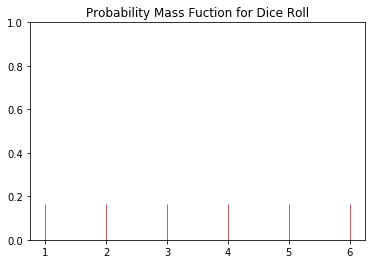

In [13]:
roll_options = [1,2,3,4,5,6]

t_prob = 1 # total probability

prob_roll = t_prob / len(roll_options)

uni_plot = sns.rugplot(roll_options, height=prob_roll, 
                       c='indianred')

uni_plot.set_title('Probability Mass Fuction for Dice Roll')

We can see: f(x) value equal to 1/(Total Possible Outcomes).

Let's find the mean and variance of this uniform distribution.

The mean is the max and min divided by two:

$$
\mu = \frac{b+a}{2}
$$

With a variance of:

$$
\sigma^2 = \frac{(b-a+1)^2-1)}{12}
$$

Let's create a Discrete Uniform Distribution using Scipy

In [11]:
from scipy.stats import randint

low, high = 1, 7

mean, var = randint.stats(low, high)

print('The mean is {};\nThe var is {}'.format(mean, var))

The mean is 3.5;
The var is 2.9166666666666665


<BarContainer object of 6 artists>

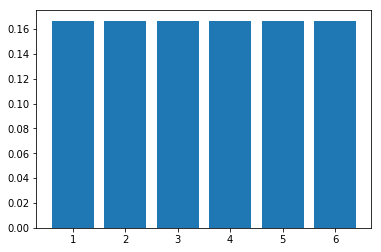

In [14]:
plt.bar(roll_options, randint.pmf(roll_options, low, high))

### Real world use: German Tank Problem

Let's solve the famous *German Tank Problem*:

In [16]:
url = 'https://en.wikipedia.org/wiki/German_tank_problem'
webbrowser.open(url)

True

For example, let’s say 10 tanks were captured/destroyed, 
    and the following serial numbers were obtained:
        117, 232, 122, 173, 167, 12, 168, 204, 4, 229.

How many tanks were produced?

$$
\mathbb{S} = m + \frac{m}{n} - 1
$$

where m is the highest sampled serial number and n is the sample size.

In [19]:
tank_list = [117, 232, 122, 173, 167, 12, 168, 204, 4, 229]

assert len(tank_list) == 10

In [25]:
m = max(tank_list)

n = len(tank_list)

tank_S = m + m/n - 1

print('There are {} german tanks.'.format(round(tank_S)))

There are 254 german tanks.


# Third page

## Continuous Uniform Distributions

#### Data can't be divided into discrete components.

A continuous random variable X 
    with a probabilty density function 
        is a continous uniform random variable when:

$$
f(x) = \frac{1}{(b-a)}
$$

$$
a <= x <= b
$$

The mean is simply the average of the min and max:

$$
\frac{(a + b)}{2}
$$

The variance if defined as:

$$
\sigma^2 = \frac{(b-a)^2}{12}
$$

Example problem.

On average, a taxi ride in NYC takes 22 minutes.
We gather that all the taxi rides 
    are uniformly distributed between 19 and 27 minutes.
    
What is the probability density function of a taxi ride, of f(x)?

In [34]:
lower_bound = 19

upper_bound = 27

fx = 1.0/(upper_bound - lower_bound)

print('The probability density func results in {}.'.format(round(fx, 3)))

The probability density func results in 0.125.


In [39]:
var = ((upper_bound - lower_bound)**2) / 12

print('The variance of the continuous uniform distribution is {}.'.
      format(round(var, 1)))

The variance of the continuous uniform distribution is 5.3.


What's the prob-ty that the taxi ride will last **at least** 25 min?

In [45]:
fx_1 = 27.0/(upper_bound-lower_bound) # fx(27)

fx_2 = 25.0/(upper_bound-lower_bound) # fx(25)

ans = fx_1 - fx_2

print('The prob-ty that the taxi ride will last at least 25 min is {}%.'.
     format(int(ans*100)))

The prob-ty that the taxi ride will last at least 25 min is 25%.


Now let's see how to do this automatically with scipy:

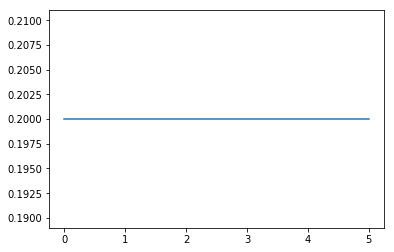

In [46]:
from scipy.stats import uniform
import numpy

A = 0
B = 5

x = np.linspace(A, B, 100) # array with points between A and B
rv = uniform(loc=A, scale=B)

plt.plot(x, rv.pdf(x))

# Fourth page

## Binominal Distribution

#### Binominal is a specific type of a discrete probability distribution.

Let's see an example first:

Two players are playing basketball, player A and player B.

Player A takes an average of 11 shots per game,
    and has an average success rate of 72%.

Player B takes an average of 15 shots per game,
    but has an average success rate of 48%.
    
Question 1: What's the probability that Player A 
    makes 6 shots in an average game?

Question 2: What's the probability that Player B
    makes 6 shots in an average game?

We can classify this as binominal experiment 
    if the following conditions are met:
    
    1. The process consists of a sequence of n trials;
    
    2. Only two exclusive outcomes are possible for each trial
        (A success and A failure);
    
    3. If the probability of a success is 'p' 
        then the probability of failure is q = 1-p;
        
    4. The trials are independent.   

The formula for a Binominal Distribution Probability 
    Mass Function turns out to be:

$$
Pr(X = k) = C(n, k)*p^k*(1-p)^{n-k}
$$

where: 

    n = number of trials, 
    
    k = number of successes, 
    
    p = probability of success, 
    
    1-p = probability of failure (often written as q=1-p).

Ths means that to get exactly 'k' successes in 'n' trials
    we want exactly 'k' successes:

$$
p^k
$$

and we want 'n-k' failures:

$$
(1-p)^{n-k}
$$

Then finally, there are

$$
C(n, k)
$$

ways of putting 'k' successes in 'n' trials.
        
So we multiply all these together 
    to get the probability of exactly that 
        many success and failures in those **n** trials!

Quick note, **C(n,k)** refers to the number 
        of possible combinations of **n** things 
            taken **k** at a time.

This is also equal to:

$$
C(n, k) = \frac{n!}{k!(n-k)!}
$$

### Let's try out the example problem!

In [64]:
p_A = .72 # prob success for A

n_A = 11 # number of shots for A

k = 6 

import scipy.special as sc # scipy for combination

comb_A = sc.comb(n_A, k)

answer_A = comb_A * (p_A**k) * ((1-p_A)**(n_A-k))

answer_A = 100*answer_A

p_B = .48
n_B = 15
comb_B = sc.comb(n_B, k)
answer_B = comb_B * (p_B**k) * ((1-p_B)**(n_B-k)) * 100

print('The probability of player A ' 
      'making 6 shots in an average game is {}%.\n'.format(round(answer_A, 1)))

print('The probability of player B '
      'making 6 shots in an average game is {}%.'.format(round(answer_B, 1)))

The probability of player A making 6 shots in an average game is 11.1%.

The probability of player B making 6 shots in an average game is 17.0%.


Even though player B is technically a worse shooter,
    he will have a higher chance of making 6 shots in an average game!

But wait a minute... Maybe player A 
    will have stronger effect in a higher amount of shots.
   
What's the probability of making 9 shots a game for either player?

In [66]:
k = 9

comb_A = sc.comb(n_A, k)
comb_B = sc.comb(n_B, k)

answer_A = 100 * comb_A * (p_A**k) * ((1-p_A)**(n_A-k))
answer_B = 100 * comb_B * (p_B**k) * ((1-p_B)**(n_B-k))

print('The probability of player A ' 
      'making 9 shots in an average game is {}%.\n'.format(round(answer_A, 1)))

print('The probability of player B ' 
      'making 9 shots in an average game is {}%.'.format(round(answer_B, 1)))

The probability of player A making 9 shots in an average game is 22.4%.

The probability of player B making 9 shots in an average game is 13.4%.


Now we see that player's A ability level 
    gives better odds of making exactly 9 shots.
   
We need to keep in mind 
    that we are asking about the probability of making
        exactly those amount of shots.

#### Let's investigate the mean and standard seviation for the binomial distribution.

The mean of a binomial distribution is simply:

$$
\mu = n * p
$$

This intuitively makes sense:
    the average number of successes should be 
        the total trials multiplied by your average success rate. 

Similarly we can see that standard deviation of a binomical is:

$$
\sigma = \sqrt{n * q * p}
$$

So now we can ask, 
    whats the average number of shots each player 
        will make in a game +/- a standard distribution?

In [74]:
mu_A = n_A * p_A
mu_B = n_B * p_B

sigma_A = (n_A * p_A * (1 - p_A)) ** 0.5
sigma_B = (n_B * p_B * (1 - p_B)) ** 0.5

print('Player A will make an average of {} +/- {} shots '
      'per game.\n'.format(round(mu_A), round(sigma_A)))

print('Player B will make an average of {} +/- {} shots ' 
      'per game.'.format(round(mu_B), round(sigma_B)))

Player A will make an average of 8 +/- 1 shots per game.

Player B will make an average of 7 +/- 2 shots per game.


#### Let's see how to automatically make a binomial distribution:

In [85]:
from scipy.stats import binom

mean, var = binom.stats(n_A, p_A)

print('Mean is ' + str(mean) + ';\n' + 'Stand dev is '+ str(var**0.5))

Mean is 7.92;
Stand dev is 1.4891608375189027


#### We can also get the probability mass function:

Let's try another example.

Imagine you flip a fair coin. Prob of success is p = 0.5.

What does probabilty mass function look like for 10 coin flips?

In [91]:
import numpy as np

n = 10 
p = 0.5

x = range(n+1)

Y = binom.pmf(x, n, p) # create the prob mass func

Y

array([0.00097656, 0.00976563, 0.04394531, 0.1171875 , 0.20507813,
       0.24609375, 0.20507813, 0.1171875 , 0.04394531, 0.00976563,
       0.00097656])

#### Finally, let's plot the binomial distribution to get the fill picture:

Text(0, 0.5, 'Probability')

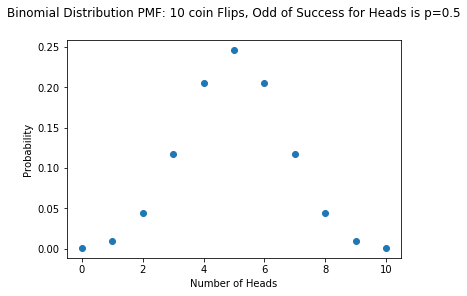

In [93]:
import matplotlib.pyplot as plt

plt.plot(x, Y, 'o')

plt.title('Binomial Distribution PMF: '
          '10 coin Flips, Odd of Success for Heads is p=0.5', y=1.08)

plt.xlabel('Number of Heads')
plt.ylabel('Probability')